<a href="https://colab.research.google.com/github/smlabto/TwitterEDA/blob/main/SMLab_TwitterEDA_June2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load the input file, change 'url2' to load your own CSV file. 
url='https://drive.google.com/file/d/1-tVaDuifkyhoBMZ7RoxTR82v6vCn56mB/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]

pdf = pd.read_csv(url2)

In [ ]:
pdf.head(10)

,tweet_id,tweetstatus,language,Toxicity,Severe Toxicity,Profane,Identity Attack,Insult,Threat,Sexually Explicit,Flirtation
0,1311970726077964288,TWEET_OK,und,0.119076,0.068905,0.147042,0.107139,0.110662,0.093267,0.136995,0.317990
1,1311970729882202120,TWEET_OK,en,0.086563,0.048753,0.090804,0.046894,0.084564,0.120585,0.057114,0.622633
2,1311970729878065152,TWEET_OK,en,0.061720,0.022030,0.041967,0.031802,0.045709,0.062502,0.068961,0.309925
3,1311970729542418434,TWEET_OK,en,0.084803,0.026625,0.034505,0.060155,0.098395,0.044585,0.034928,0.377152
4,1311970728460288000,TWEET_OK,en,0.242476,0.109693,0.135540,0.137921,0.294618,0.135197,0.106473,0.344011
5,1311970728309329921,TWEET_OK,en,0.153549,0.076977,0.151857,0.083806,0.144733,0.115679,0.138470,0.300352
6,1311970728066023425,TWEET_OK,en,0.093180,0.040252,0.071289,0.025562,0.072670,0.063429,0.049509,0.249411
7,1311970727277539329,TWEET_OK,en,0.587656,0.296264,0.369718,0.143736,0.635648,0.271658,0.124751,0.264067
8,1311970726866563073,TWEET_OK,en,0.059740,0.023231,0.039789,0.020359,0.040082,0.048825,0.022226,0.197688
9,1311970726665170944,TWEET_OK,en,0.079496,0.041154,0.092239,0.076223,0.049327,0.067674,0.056606,0.198862


In [ ]:
#Display brief info about the dataset
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298173 entries, 0 to 298172
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tweet_id           298173 non-null  int64  
 1   tweetstatus        298173 non-null  object 
 2   language           298173 non-null  object 
 3   Toxicity           298173 non-null  float64
 4   Severe Toxicity    298173 non-null  float64
 5   Profane            298173 non-null  float64
 6   Identity Attack    298173 non-null  float64
 7   Insult             298173 non-null  float64
 8   Threat             298173 non-null  float64
 9   Sexually Explicit  298173 non-null  float64
 10  Flirtation         298173 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 25.0+ MB


In [ ]:
pdf["language"].unique()

array(['und', 'en', 'tl', 'de', 'ja', 'hi', 'es', 'zh', 'et', 'iw', 'ht',
       'nl', 'in', 'ar', 'tr', 'vi', 'pl', 'am', 'fa', 'no', 'ru', 'fr',
       'pt', 'it', 'cy', 'da', 'ko', 'el', 'is', 'sv', 'lv', 'lt', 'ckb',
       'th', 'ca', 'eu', 'mr', 'ro', 'hu', 'bn', 'sl', 'ml', 'cs', 'ps',
       'ur', 'fi', 'te', 'hy', 'ta', 'gu', 'ug', 'ka', 'pa', 'kn', 'ne',
       'my', 'or', 'bg', 'si', 'uk', 'bo', 'km'], dtype=object)

In [ ]:
#How many different languages used in the tweets?
len(pdf["language"].unique())

62

In [ ]:
#Top 10 most used languages
pdf_en_count = pdf.groupby("language")['tweet_id'].count().reset_index(name="count").sort_values('count',ascending=False).head(10)
pdf_en_count

,language,count
12,en,247975
58,und,33335
13,es,2871
54,tl,1927
24,in,1074
61,zh,1056
21,ht,988
14,et,976
1,ar,946
28,ja,816


In [ ]:
#Filter dataframe for tweets only in english language
pdf_en = pdf[pdf['language']=='en']
pdf_en.head()

,tweet_id,tweetstatus,language,Toxicity,Severe Toxicity,Profane,Identity Attack,Insult,Threat,Sexually Explicit,Flirtation
1,1311970729882202120,TWEET_OK,en,0.086563,0.048753,0.090804,0.046894,0.084564,0.120585,0.057114,0.622633
2,1311970729878065152,TWEET_OK,en,0.061720,0.022030,0.041967,0.031802,0.045709,0.062502,0.068961,0.309925
3,1311970729542418434,TWEET_OK,en,0.084803,0.026625,0.034505,0.060155,0.098395,0.044585,0.034928,0.377152
4,1311970728460288000,TWEET_OK,en,0.242476,0.109693,0.135540,0.137921,0.294618,0.135197,0.106473,0.344011
5,1311970728309329921,TWEET_OK,en,0.153549,0.076977,0.151857,0.083806,0.144733,0.115679,0.138470,0.300352


In [ ]:
#Create feature dataframe for further analysis from the pdf_en dataframe
pdf_en_feature = pdf_en[["Toxicity","Severe Toxicity", "Profane", "Identity Attack", "Insult", "Threat"]]
pdf_en_feature.head()

,Toxicity,Severe Toxicity,Profane,Identity Attack,Insult,Threat
1,0.086563,0.048753,0.090804,0.046894,0.084564,0.120585
2,0.061720,0.022030,0.041967,0.031802,0.045709,0.062502
3,0.084803,0.026625,0.034505,0.060155,0.098395,0.044585
4,0.242476,0.109693,0.135540,0.137921,0.294618,0.135197
5,0.153549,0.076977,0.151857,0.083806,0.144733,0.115679


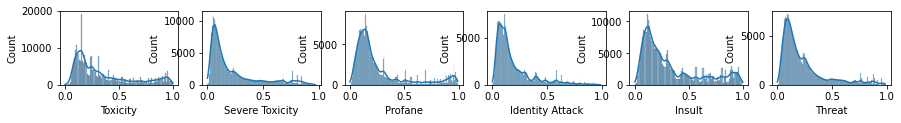

In [ ]:
# distribution of toxic score values
# note: sns.histplot requires seaborn ver. 0.11+
number_of_columns = 8
number_of_rows =  1
l = pdf_en_feature.columns.values
plt.figure(figsize=(20,3))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.histplot(pdf_en_feature[l[i]],kde=True)

In [ ]:
#Get the correlation matrix of the features dataframe
corr_mat = pdf_en_feature.corr()

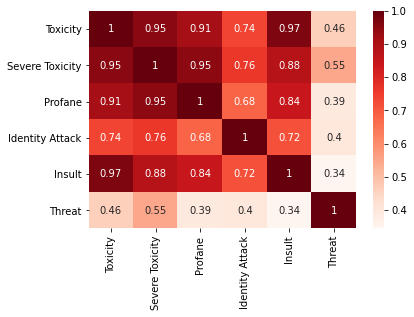

In [ ]:
#Create correlation heatmap from the correlation matrix
sns.heatmap(corr_mat,cmap='Reds', annot=True,
        xticklabels=["Toxicity","Severe Toxicity", "Profane", "Identity Attack", "Insult", "Threat"],
        yticklabels=["Toxicity","Severe Toxicity", "Profane", "Identity Attack", "Insult", "Threat"])

In [ ]:
pdf["tweetstatus"].unique()

array(['TWEET_OK', 'TWEET_DELETED', 'USER_SUSPENDED', 'USER_PROTECTED',
       'USER_DELETED', 'TWEET_BLOCKED'], dtype=object)

In [ ]:
#explain tweet status
#Count tweets based on 'tweet status'
pdf_en_tweetStatusCount = pdf_en.groupby(pdf_en['tweetstatus'])['tweet_id'].count().reset_index(name='count').sort_values('count',ascending=False)
pdf_en_tweetStatusCount

,tweetstatus,count
2,TWEET_OK,238272
1,TWEET_DELETED,4133
5,USER_SUSPENDED,2391
3,USER_DELETED,1401
4,USER_PROTECTED,1087
0,TWEET_BLOCKED,691


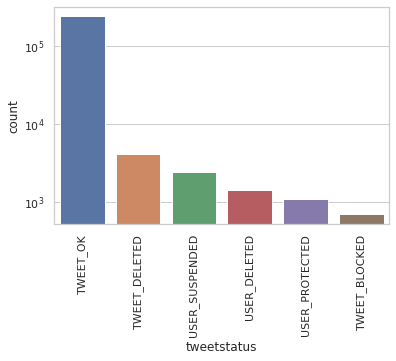

In [ ]:
#Bar plot of tweet status counts (log-scale)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
ax1 = sns.barplot(x="tweetstatus", y="count", data=pdf_en_tweetStatusCount)
ax1.set_yscale("log")

In [ ]:
#Average toxicity based on the tweet status
pdf_en_avgToxicity_vs_status = pdf_en.groupby(pdf_en['tweetstatus'])['Toxicity'].agg("mean").reset_index(name="avg_toxicity")
pdf_en_avgToxicity_vs_status

,tweetstatus,avg_toxicity
0,TWEET_BLOCKED,0.819918
1,TWEET_DELETED,0.403394
2,TWEET_OK,0.340719
3,USER_DELETED,0.388920
4,USER_PROTECTED,0.373923
5,USER_SUSPENDED,0.401506


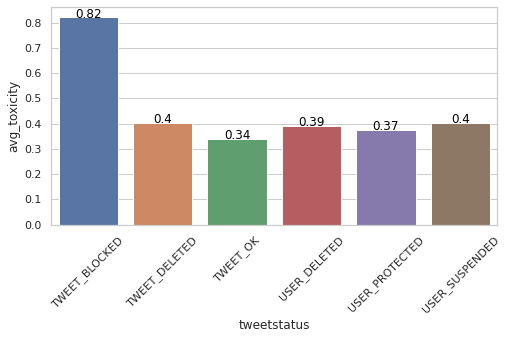

In [ ]:
#Bar graph for average toxicity versus tweet status
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,4))
plt.xticks(rotation=45)
ax2 = sns.barplot(x="tweetstatus", y="avg_toxicity", data=pdf_en_avgToxicity_vs_status)
for index, row in pdf_en_avgToxicity_vs_status.iterrows():
    ax2.text(row.name,row.avg_toxicity, round(row.avg_toxicity,2), color='black', ha="center")